# Visualizing Time Series in Python

* Time series are a fundamental way to store and analyze many types of data
* Financial, weather, and device data area all best handled as time series

#### Matplotlib
* **For a list of available matplotlib styles: `print(plt.style.available)`**
    * `plt.style.use('fivethirtyeight')`
    * `ggplot`
    * "financial times"(?)
* `df.set_index('column_name')`

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
plt.show()

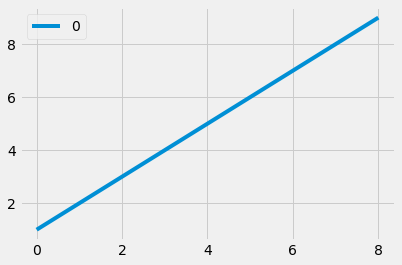

In [9]:
plt.style.use('fivethirtyeight')

plt.show()
df=pd.DataFrame([1,2,3,4,5,6,7,8,9])
df.plot()
plt.show()

* `ax = df.plot(color='blue', figsize=(12,5), fontsize=12, linewidth=3, linestyle='--')`
* `ax.set_xlabel('Date')`
* `ax.set_ylabel('The values of my y-axis', fontsize=16)`
* `ax.set_title('The title of my plot', fontsize = 16)`
* `plt.show()`

* figsize = (length, width)

#### Customize your time series plot
* Plots allow users/viewers to better understand the data
* However, you may sometimes want to highlight specific events or guide the user through your train of thought

#### Adding markers
* **`axvline`**
* **`axhline`**

* `ax.axvline(x='1969-01-01', color='red', linestyle='--')`
* `ax.axhline(y=100, color='green', linestyle='--')`

#### Highlight regions of your graph
* in order to add a shaded region to a specific area of your plot
* `ax.axvspan`
* `ax.axhspan`
* `ax.axvspan('1964-01-01', '1968-01-01', color='red', alpha=0.5)`
* `ax.axhspan(8,6, color='green', alpha=0.2)`

#### Clean your time series data
* Important to perform some investigatory analysis of your data before proceeding to more sophisticated tasks
* `df.isnull()` vs `df.notnull()`

#### Replacing missing values in a dataframe
* `df = df.fillna(method='bfill')`
* `ffill`
* `np.mean()`

#### Plot aggregates of your data
* **Moving averages** aka **rolling means** is a commonly used technique if the field of time series analysis for many purposes:
    * smoothing out short-term fluctuations
    * removing outliers 
    * highlighting long-term trends or outliers 
    * in pandas, the `.rolling()` method allows you to specify the number of data points to use when computing your metrics
* Here, (below) specify a sliding window of 52 points:

```
co2_levels_mean = co2_levels.rolling(window=52).mean()

ax = co2_levels_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel("The values of my Y axis")
ax.set_title("52 weeks rolling mean of my time series")

plt.show()
```
* The parameter of the window size of the rolling mean is usually set through trial and error, or according to some seasonality

* **Computing aggregate values of your time series**
    * When index is DateTimeIndex... `print(co2_levels.index.month)`

### Plot aggregates of your data

#### Moving averages (aka rolling mean)
* **`df_mean = df.rolling(window=12).mean()`**
* A moving average could be used for many different purposes:
    * Smoothing out short term fluctuations
    * removing outliers
    * highlighting long-term trends or cycles
* `co2_levels_mean = co2_levels.rolling(window=52).mean()`

#### Computing aggregate values of your time series

```
index_month = co2_levels.index.month
co2_levels_by_month = co2_levels.groupby(index_month).mean()
co2_levels_by_month.plot()
plt.show()
```

```
# Display boxplot of airline values
ax = airline.boxplot()
# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()
```

```
# Get month for each dates from the index of airline
index_month = airline.index.month
# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()
# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()
```
#### Computing rolling mean with upper and lower stds of 2:

```
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()
# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()
# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)
# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)
# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)
# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()
```

#### Summarizing the values in your time series data
* It is critical to collect summary statistics of any time series that you are working with 
* **Histograms:**
    * `ax2 = df.plot(kind='hist', bins=10)`
* **Kernel Density plots:**
    * A variation of histograms
    * They use kernel smoothing to plot the values of your data and allow for smoother distributions by dampening the effect of noise and outliers, all while displayiing where the mass of your data is located.
    * `ax3 = df.plot(kind='density', linewidth=2)`

```
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)
# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)
# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)
plt.show()
```

#### Autocorrelation and partial autocorrelation
* Extract and interpret patterns in time series data
* Autocorrelation, partial autocorrelation
* **Detect and visualize seasonality, trend, and noise**

#### Autocorrelation
* **Autocorrelation:** is measured as the correlation between a time series and a delayed copy of itself itself 
    * For example, an autocorrelation of order 3 returns the correlation between a time series at points(`t_1`, `t_2`, `t_3`, ...) and its own values lagged by 3 time points, i.e. (`t_4`, `t_5`, `t_6`, ...).
    * Autocorrelation is used to find repetetive patterns or periodic signal in time series
    * The concept of autocorrelation can be applied to signal, and not just time series
    * Also sometimes referred to as **autocovariance**
    
* **Plotting autocorrelation:** 

```
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(co2_levels['co2], lags=40)
plt.show()
```
* **`tsaplots.plot_acf()`**
* `lag` = maximum number of lags to compute the autocorrelation values
* Because is a correlation measure, the autocorrelation coefficient can only take values between -1 and 1
* An autocorrelation of 0 indicates no correlation, while 1 and -1 indicate strong negative and positive
* In order to help you assess the significance of autocorrelation values, the `.plot_acf()` function also computes and returns margins of uncertainty, which by default are represented in the graph as blue shaded regions; values **above these regions** can be interpretted as a time series having a statistically significant relationship with a lagged version of itself

#### Partial autocorrelation
* Going beyond autocorrelation, the partial autocorrelation measures the correlation coefficient between a time series and a lagged version of itself... HOWEVER... contrary to autocorrelation, partial autocorrelation removes the effect of previous time points
* For example, a partial autocorrelation function of `order_3` returns the correlation between our time series (`t1`, `t2`, `t3`, ...) and lagged values of itself by 3 time points (`t4`, `t5`, `t6`, ...), but only after removing all effects attributed to lags 1 and 2.
* Plotting partial autocorrelations: **`tsaplots.plot_pacf()`**

```
import matplotlib.pyplot as plt
from statsmodels.graphis import tsaplots

fig = tsaplots.plot_pacf(co2_levels['co2'], lags= 40)
plt.show()
```
* If partial autocorrelation values are close to zero, you can conclude that values are not correlated with one another.
* Inversely, partial autocorrelations that have values that are close to 1 or -1 indicate that there exist strong positive or negative correlations between the lagged observations of the time series
* If partial autocorrelation values are beyond the measure of uncertainty (which are, again, by default marked by the blue shaded regions) then you can assume that the observed partial autocorrelation values are statistically significant 

## Seasonality, trend, and noise in time series data

* Properties of time series:
* In general, most time series can be decomposed into three major components:
    
#### Seasonality 
* Does the data display a clear periodic pattern/signal?
    
#### Trend
* Does the data follow a consistent upwards or downwards slope?

#### Noise
* Are there any outlier points or missing values that are not consistent with the rest of the data? (Unexplained variance and volatility of your time series)
    




#### Time series decomposition
* When looking at time series, it may seem daunting to extract the trend of a time series, or having to manually identify its seasonality; fortunately, you don't have to do it manually.
* Instead: rely on a method called **time series decomposition** which will allow you to automatically extract and quantify the structure of time series data



```
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

reParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(co2_levels['co2'])
fig = decomposition.plot()
plt.show()
```

* `**sm.tsa.seasonal_decompose()**` function can be used to apply time series decomposition out of the box
* Note that by default, `sm.tsa.seasonal_decompose()` returns a figure of relatively small size, so it is often good practice to set the figsize before calling the function
* The `**seasonal.decompose()**` function returns an object that contains the values of all three components of interest, which are the seasonal, trend, and noise components.
    * Additionally, it is easy to extract each individual component and plot them. 
    * `print(dir(decomposition))` 
        * Use `dir` command to print out attributes associated to the decomposition variable generated in earlier step
    * `print(decomposition.seasonal)`
  
#### Seasonality  
  
```
decomp_seasonal = decomposition.seasonal

ax = decomp_seasonal.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')

plt.show()
```

* **`ax = decomp_seasonal.plot(figsize=(14,2))`**
* A seasonal pattern exists when a time series is influenced by seasonal factors
* **Seasonality should always be a fixed and known period.**
    * For example, the temperature of the day should display clear daily seasonality, as it is always warmer during the day than at night
    * Alternatively, it could also display monthly seasonality, as it is always warmer in summer, as compared with winter.


#### Trend component in time series

```
decomp_trend = decomposition.trend
ax.set_xlabel('Date')
ax.set_ylabel('Trend of the time series')
ax.set_title('Trend values of the time series')
plt.show()
```

* The **trend component** reflects the overall progression of the timeseries and can be extracted using the `decomposition.trend` command
* You can then use the familiar `.plot()` method to plot and annotate the trend values of your time series data.


#### Noise component in time series

```
decomp_resid = decomp.resid

ax = decomp_resid.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()
```
* The **noise describes random, irregular influences that could not be attributed to either trend or seasonality.**

* **also: `seasonal.observed`

# Working with multiple time series
* In this chapter, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series.

#### Summarizing and plotting multiple time series

```
plt.style.use("fivethirtyeight")
ax = df.plot(figsize = (12,4), fontsize = 14)
plt.show()
```

#### Area charts

```
plt.style.use("fivethirtyeight")
ax = df.plot.area(figsize = (12,4), fontsize = 14)
plt.show()
```
* Can be leveraged to represent cumulative totals
* **`.plot.area()`**

#### Plot multiple time series
* **`colormap`**
    * `ax=df.plot(colormap='Dark2', figsize = (14,7))`
    * Either define your own colormap, or use a colormap pre-defined with assigned colors by matplotlib

#### Enhancing your plot with information (like .describe() table)

```
ax = df.plot(colormap='Dark2', figsize=(14,7))
df_summary = df.describe()
ax.table(cellText = df_summary.values,
                    # Specify width of the table
                    colWidths = [0.3]*len(df.columns),
                    # Specify row labels
                    rowLabels=df_summary.index,
                    # Specify column labels
                    calLabels=df_summary.columns
                    # Specify location of the table
                    loc='top')
plt.show()
```
***
```
# Plot the time series data in the DataFrame
ax = df.plot()

# Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values, 
         colWidths=[0.3]*len(df.columns), 
         rowLabels=df_summary.index, 
         colLabels=df_summary.columns, 
         loc='top')
```

#### Dealing with different scales
* In some circumstances, you may want to distinguish the time series in a dataset and have them plotted on individual graphs that are part of a larger figure
* A side of times series with datasets of different amplitude and scale is that the y-axis is automatically scaled to the time series with the largest values
* $\star$ In order to overcome issues with visualizing datasets containing time series of different scales, you can leverage the `subplots` argument which will plot each column of a dataframe on a different sublot

```
df.plot(subplots=True, 
        linewidth=0.5,
        layout=(2,4),
        figsize=(16,10),
        sharex=False,
        sharey=False)
plt.show()
```
* It is important to ensure that the total number of subplots is greater than or equal to the number of time series in your dataframe.

### Find relationships between multiple time series
* The standard way to compute correlation coefficient is with **Pearson's correlation coefficient**, which can be used to compute correlation coefficient when the relationship is thought to be linear.
* Otherwise, you can use the **Kendall Tau** or **Spearman** rank to compute correlation coefficient when the relationship is thought to be non-linear

* `from scipy.stats.stats import pearsonr` : `pearson(x, y)`
* `from scipy.stats.stats import spearmanr` : `spearman(x, y)`
* `from scipy.stats.stats import kendalltau` : `kendalltau(x, y)`

* When computing the correlation coefficient between more than two variables at a time, you will need a correlation matrix
* Correlation coefficients can take any value between (-1,1)
* Correlation of 0 indicates no relationship
* A correlation matrix will always be symmetric
    * The correlation between x and y will always be identical to the correlation between y and x
* Diagonal values will always be equal to one

* `corr_p = meat[['beef', 'veal', 'turkey']].corr(method='pearson')`
* `corr_s = meat[['beef', 'veal', 'turkey']].corr(method='spearman')`

* The heatmap is a useful tool to visualize correlation matrices, but the lack of ordering can make it difficult to read, or even identify which groups of the time series are the most similar

#### Clustermap
* `sns.clustermap(corr_matrix)`
    * applies hierarchical clustering to your correlation matrix to plot a sorted heatmap, where similar time series are place closer to one another 

```
jobs.plot(subplots=True,
          layout=(4,4),
          figsize=(20,16),
          sharex = True,
          sharey = False)
plt.show()
```

#### Annotating events in the jobs dataset

```
ax = jobs.plot(figsize=(20,14), colormap='Dark2')
ax.axvline('2008-01-01', color='black', linestyle='--')
ax.axvline('2009-01-01', color='black', linestyle= '--')
```

#### Taking seasonal average in the jobs dataset

```
index_month = jobs.index.month
jobs_by_month = jobs.groupby(index_month).mean()
print(jobs_by_month)
ax= jobs_by_month.plot(figsize=(12,5), colormap='Dark2')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')

### Decompose time series data
* Apply and visualize time series decomposition to multiple time series. For this you'll have to leverage the dictionary data structure in Python
* By leveraging a key-value data structure, such as Python dictionaries, you can store the results of each time series decomposition
#### Decomposing multiple time series with Python dictionaries

* **Example: extracting trend**

```
import statsmodels.api as sm
my_dict = {}
ts_names = df.columns

for ts in ts_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    my_dict[ts] = ts_decomposition

my_dict_trend = {}
for ts in ts_names:
    my_dict_trend[ts] = my_dict[ts].trend
trend_df = pd.DataFrame.from_dict(my_dict_trend)
```


#### Create time series decomposition dictionary

```
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition
```
#### Extract seasonality

```
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()
```

### Compute correlations between time series 

```
trend_corr = trend_df.corr(method = 'spearman')
fig = sns.clustermap(trend_corr, annot=True, linewidth= 0.4)

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.setp(fig, ax_heatmap.xaxis.get_majortickelabels(), rotation=90)


#### The importance of time series in business:
   * to identify seasonal patterns and trends
   * to study past behaviors
   * to produce robust forecasts
   * to evaluate and compare company achievements.

#### Getting to the next level with other DC courses:
   * Manipulating Time Series Data in Python
   * Importing & Managing Financial Data in Python
